# 주성분 분석 패키지 활용 모듈화 기능 확인

## #01. 준비작업

### [1] 패키지 가져오기

`pca` 패키지의 설치가 필요하다.

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### [2] 데이터 가져오기 + 스케일링

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/iris.xlsx", info=False)

x = origin.drop("Species", axis=1)
df = my_standard_scaler(x)
df


상위 5개 행
+----+----------------+---------------+----------------+---------------+-----------+
|    |   Sepal.Length |   Sepal.Width |   Petal.Length |   Petal.Width | Species   |
|----+----------------+---------------+----------------+---------------+-----------|
|  0 |            5.1 |           3.5 |            1.4 |           0.2 | setosa    |
|  1 |            4.9 |             3 |            1.4 |           0.2 | setosa    |
|  2 |            4.7 |           3.2 |            1.3 |           0.2 | setosa    |
|  3 |            4.6 |           3.1 |            1.5 |           0.2 | setosa    |
|  4 |              5 |           3.6 |            1.4 |           0.2 | setosa    |
+----+----------------+---------------+----------------+---------------+-----------+


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


## #02. 모듈 활용 주성분 분석

기본값은 설명된 분산의 `95%` 이상을 포함하는 성분의 개수가 추출되도록 설정되어 있음

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [4] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
+-----+----------------+---------------+----------------+---------------+
|     |   Sepal.Length |   Sepal.Width |   Petal.Length |   Petal.Width |
|-----+----------------+---------------+----------------+---------------|
| PC1 |       0.521066 |     -0.269347 |      

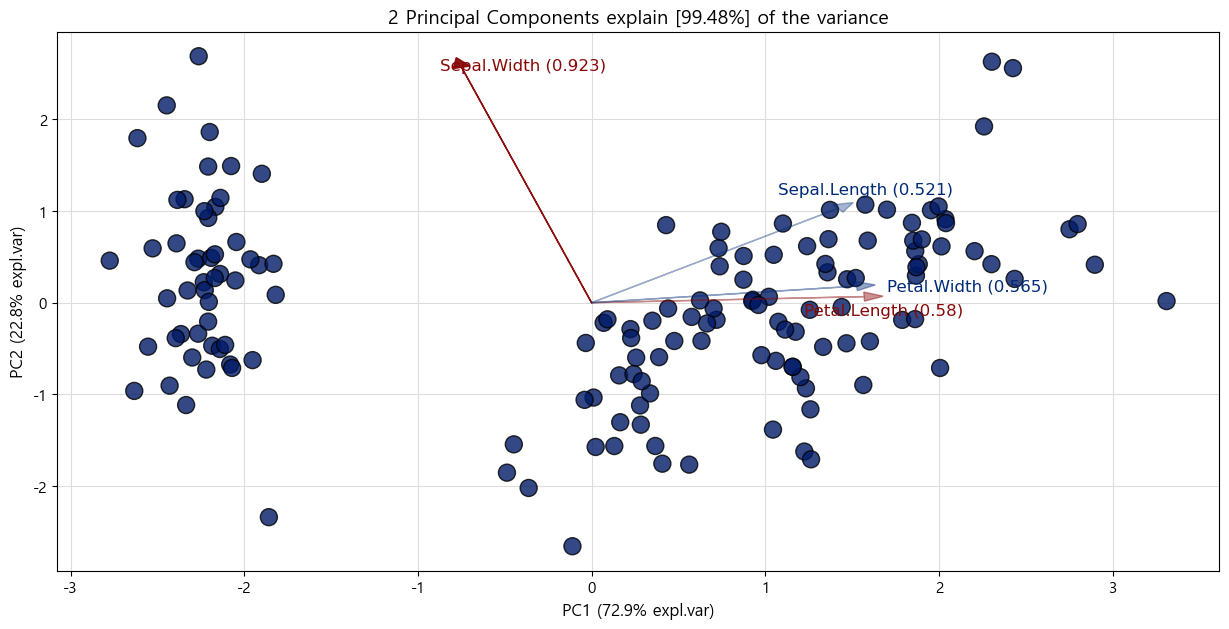

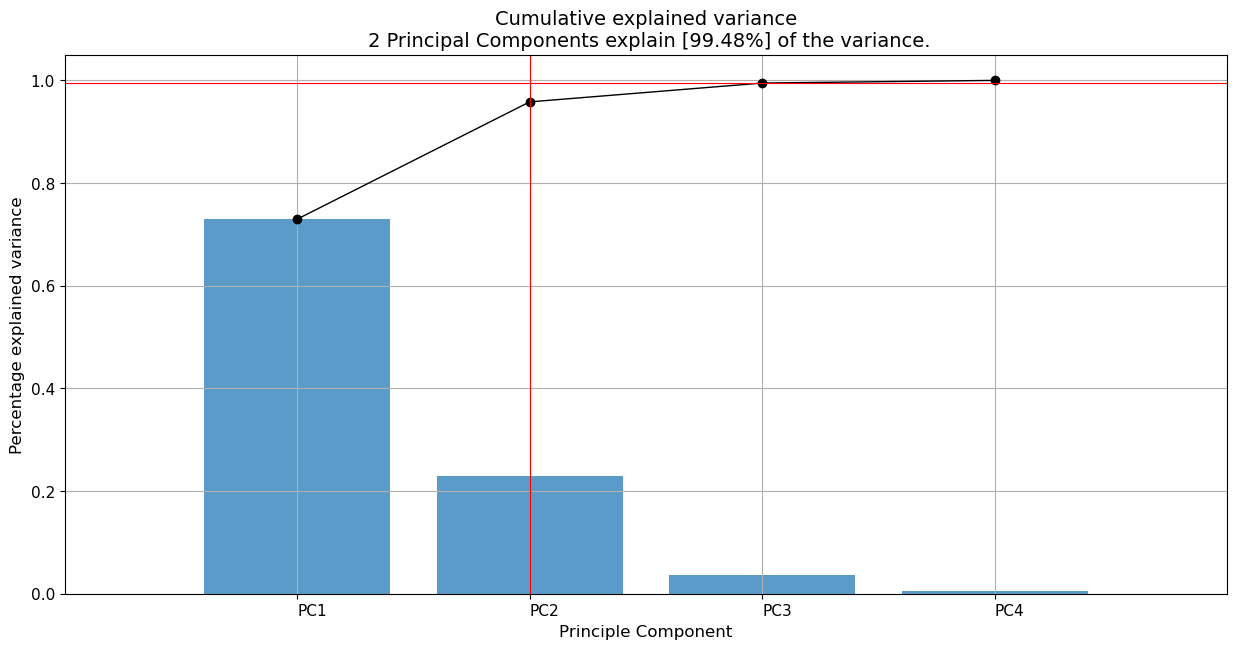

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [3]:
pca = my_pca(df)
pca

+------------+---------+
| target     |   label |
|------------+---------|
| setosa     |       0 |
| versicolor |       1 |
| virginica  |       2 |
+------------+---------+
LogisticRegression({'n_jobs': -1, 'random_state': 1234}) {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [1000]}
KNeighborsClassifier({'n_jobs': -1}) {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
SVC({'random_state': 1234}) {}
GaussianNB({}) {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}
DecisionTreeClassifier({'random_state': 1234}) {'criterion': ['gini', 'entropy']}
SGDClassifier({'n_jobs': -1, 'random_state': 1234, 'early_stopping': True}) {'loss': ['hinge', 'log_loss', 'modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000, 2000, 3000, 4000, 5000], 'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'], 'eta0': [0.01, 0.1, 0.5]}
+---------

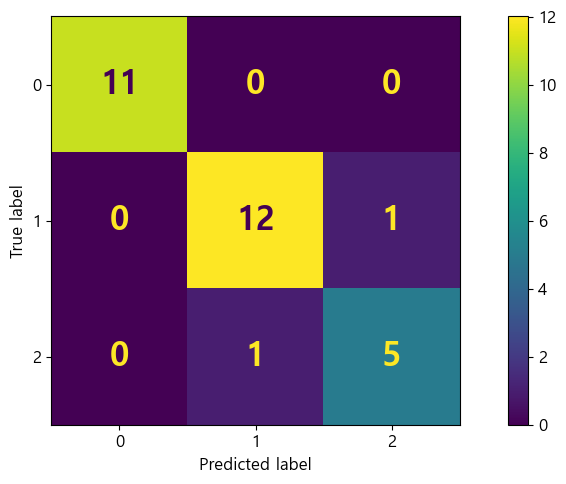


[Roc Curve]


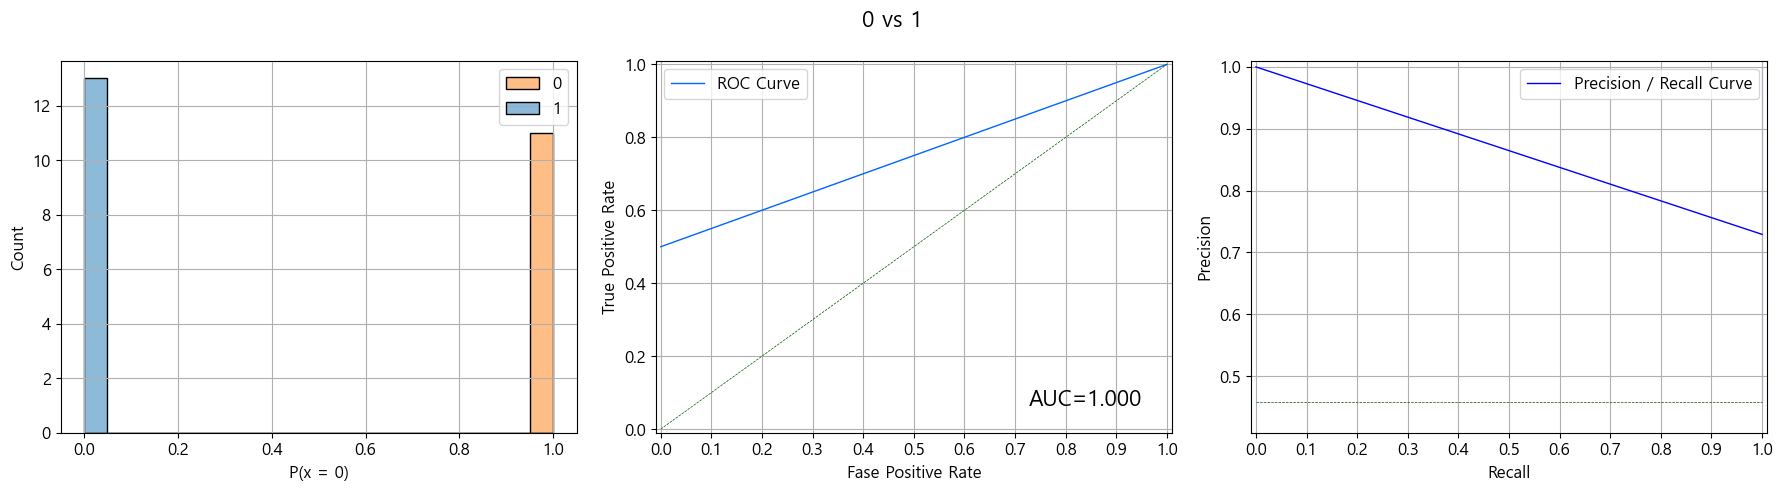

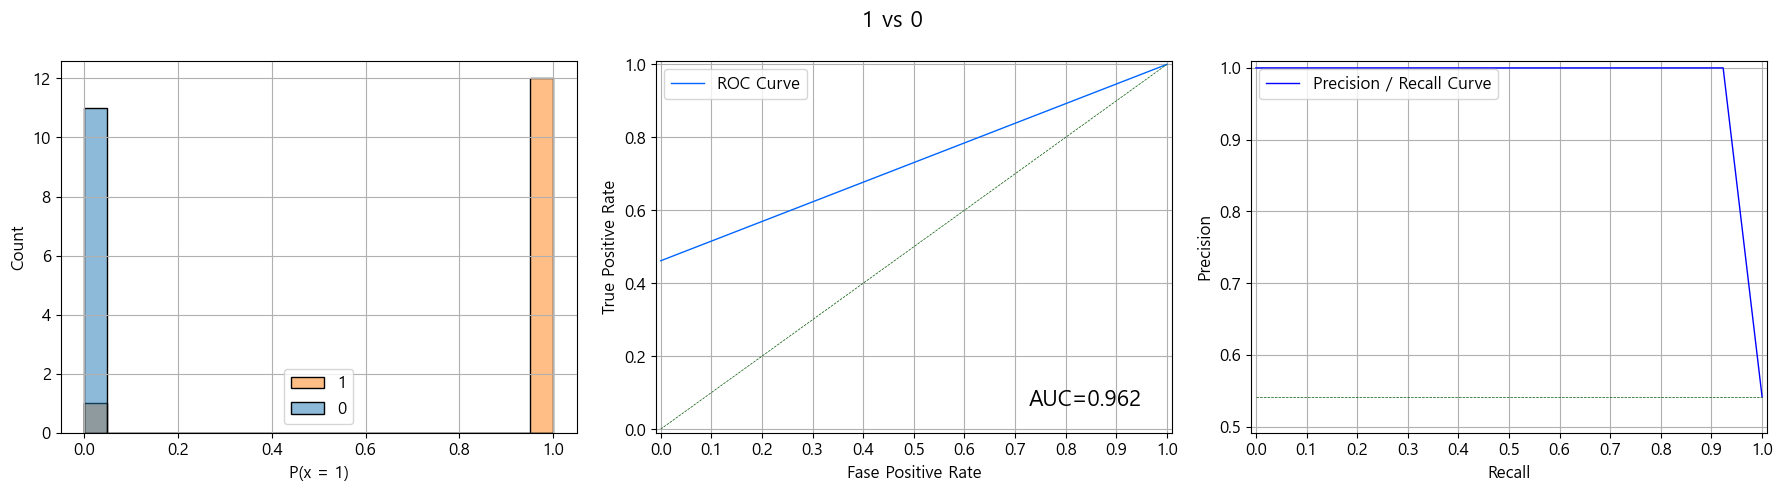

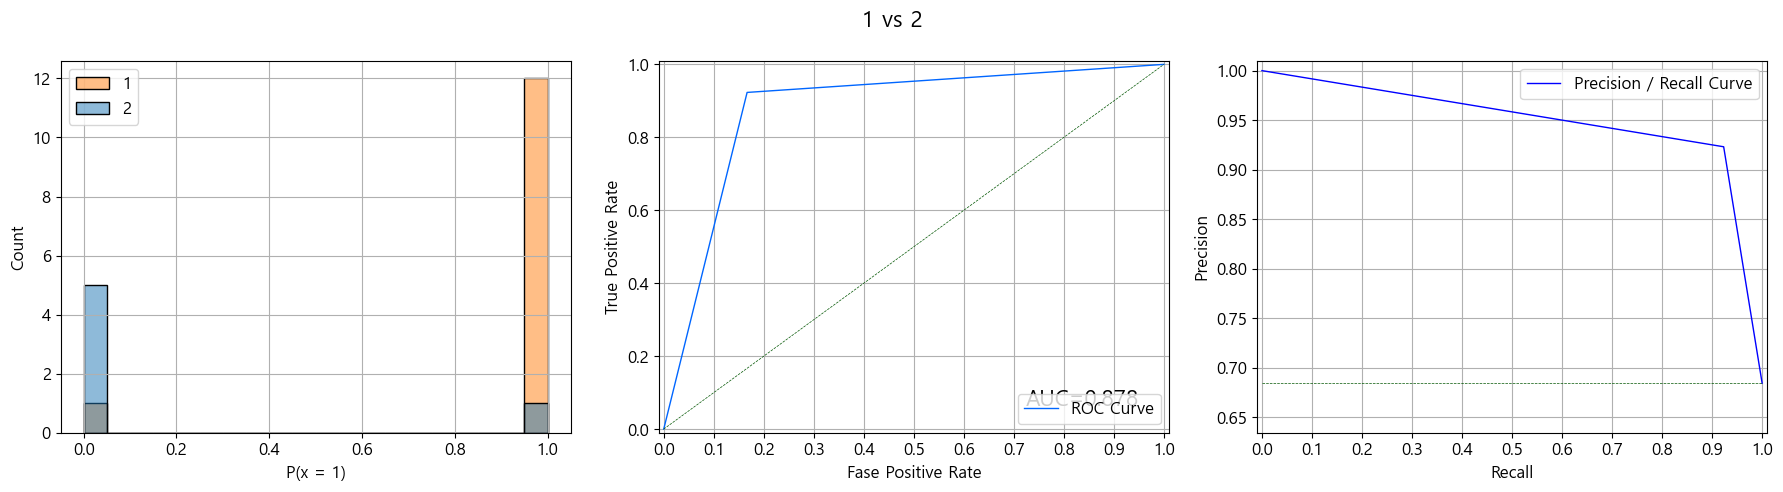

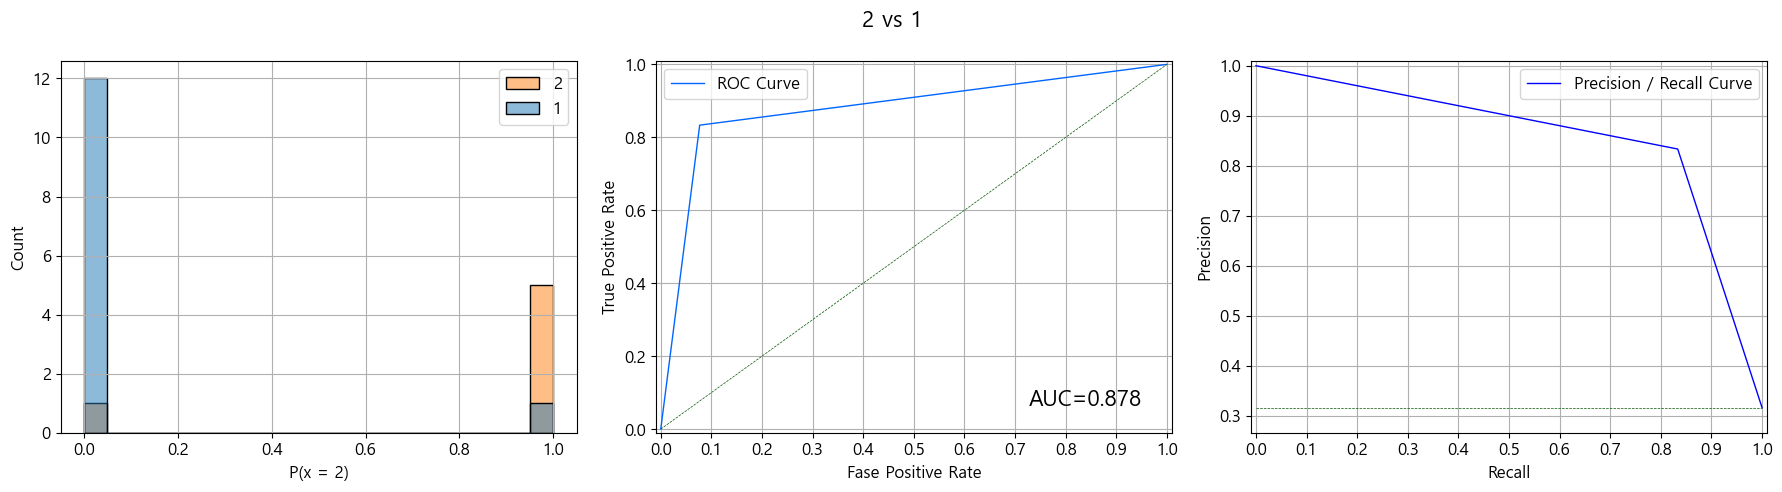

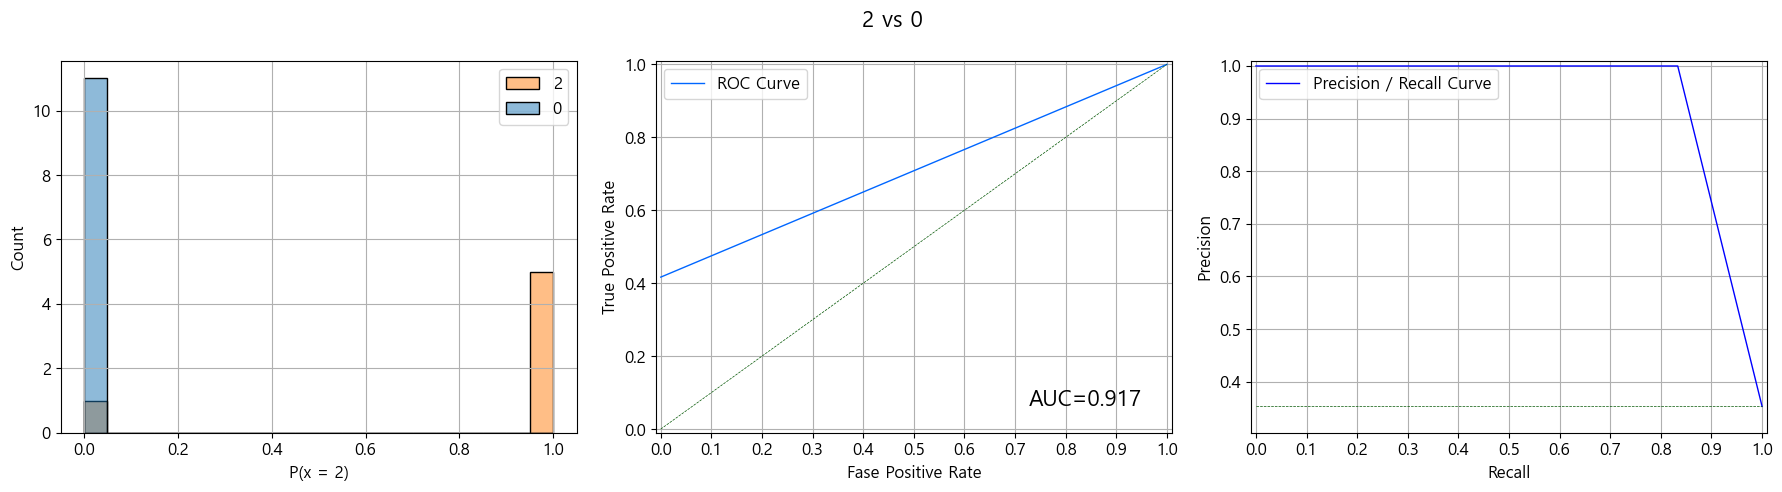

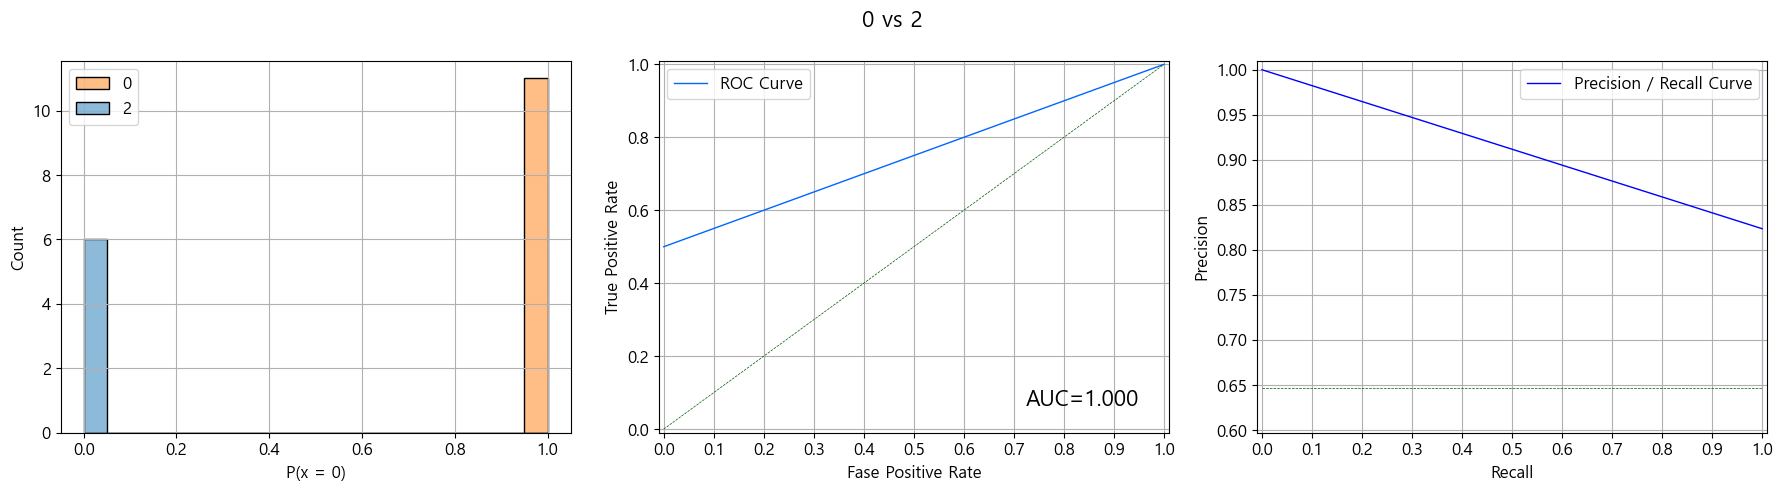

mean roc auc ovo: 0.9391


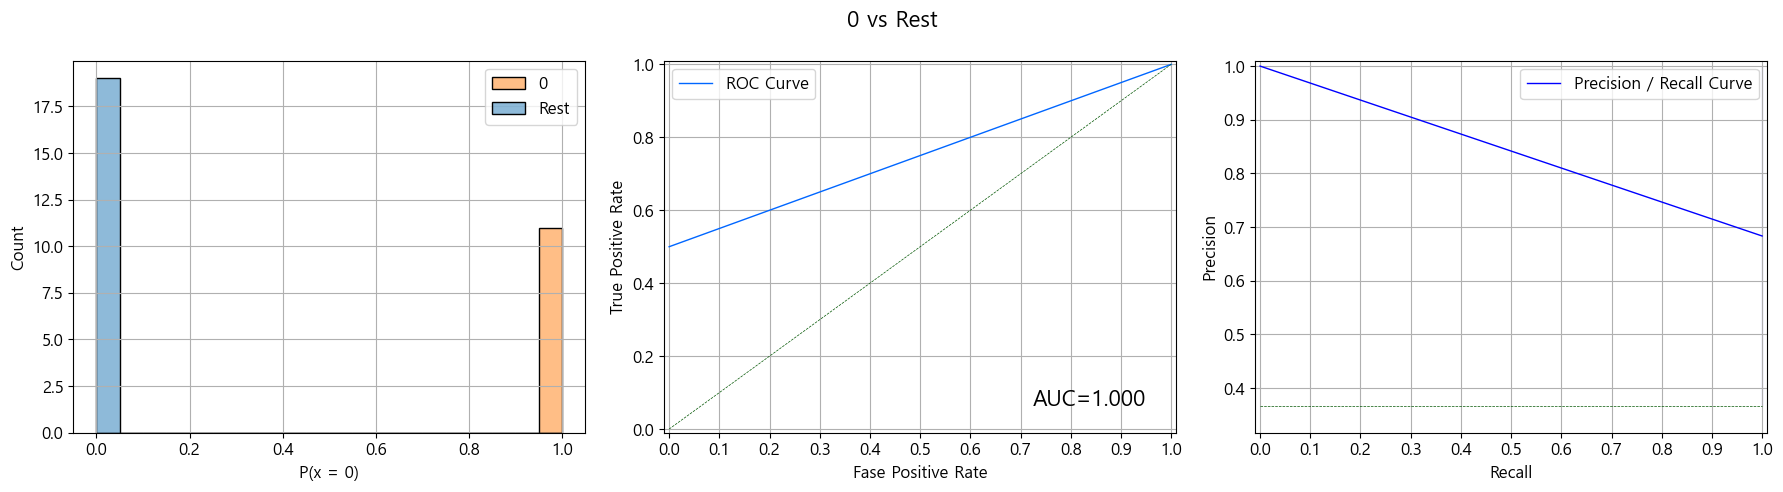

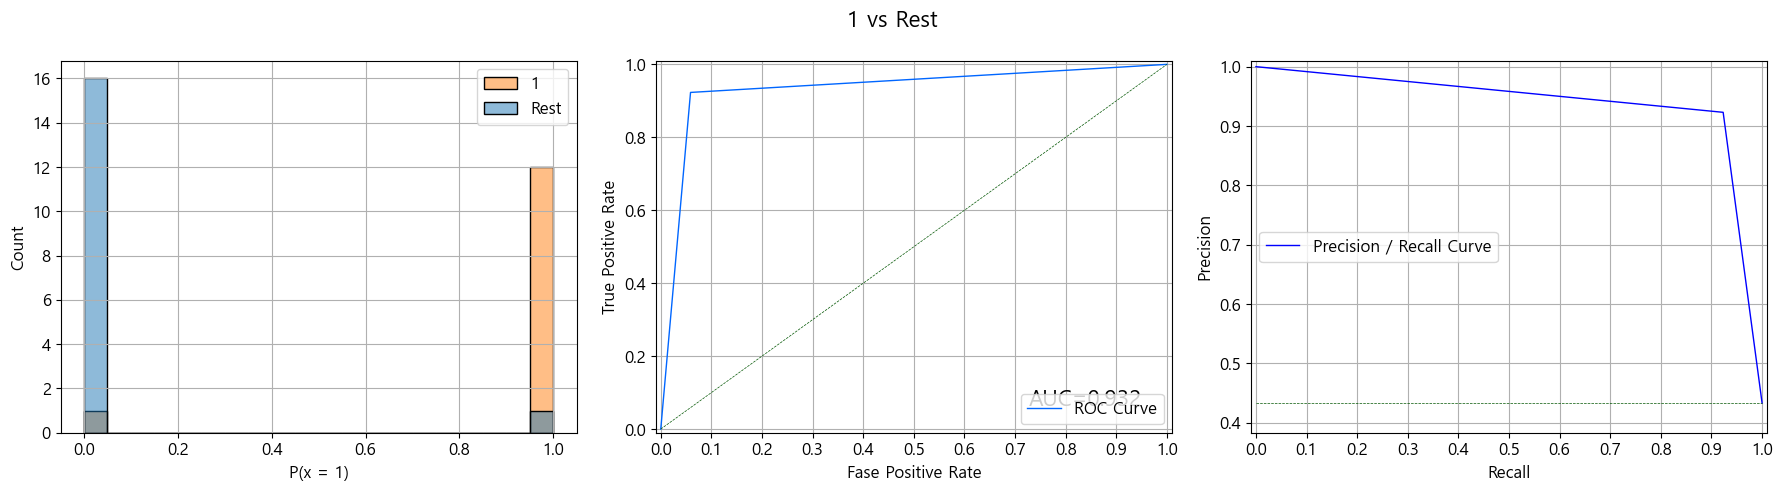

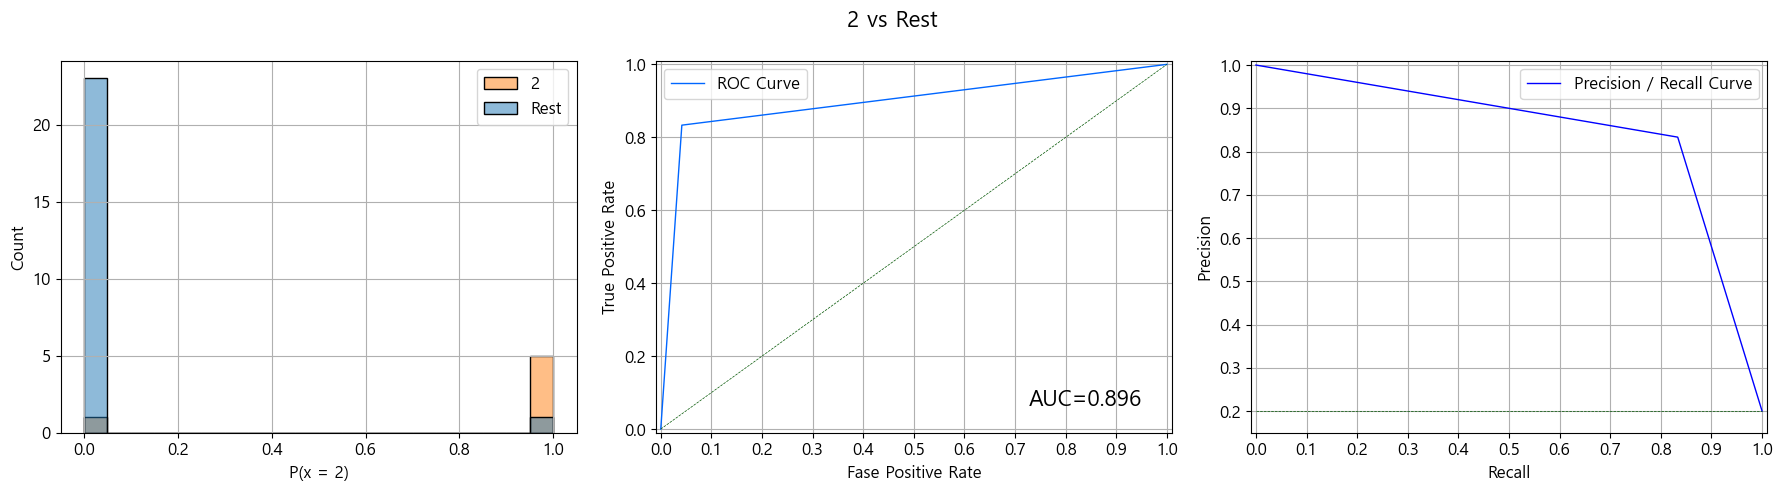

mean roc auc ovo: 0.9427

[학습곡선]


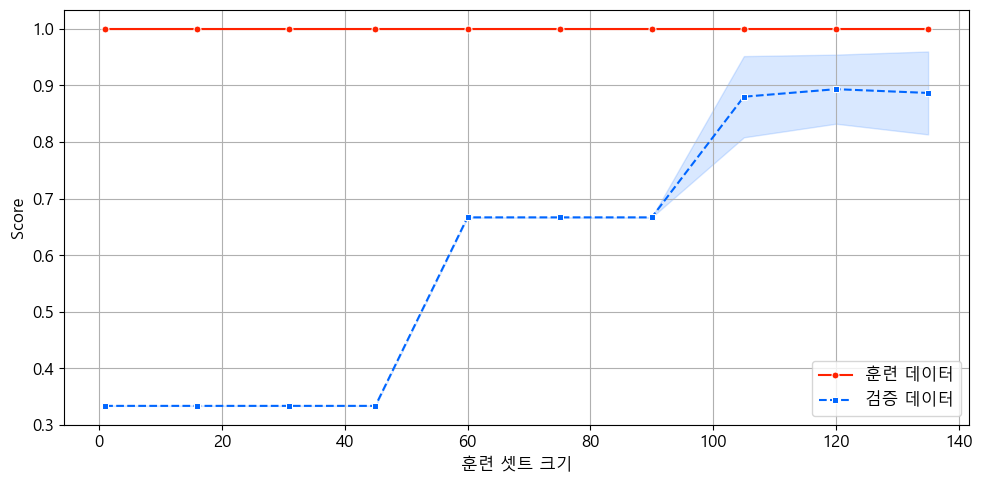

depth: 8 leaves: 13


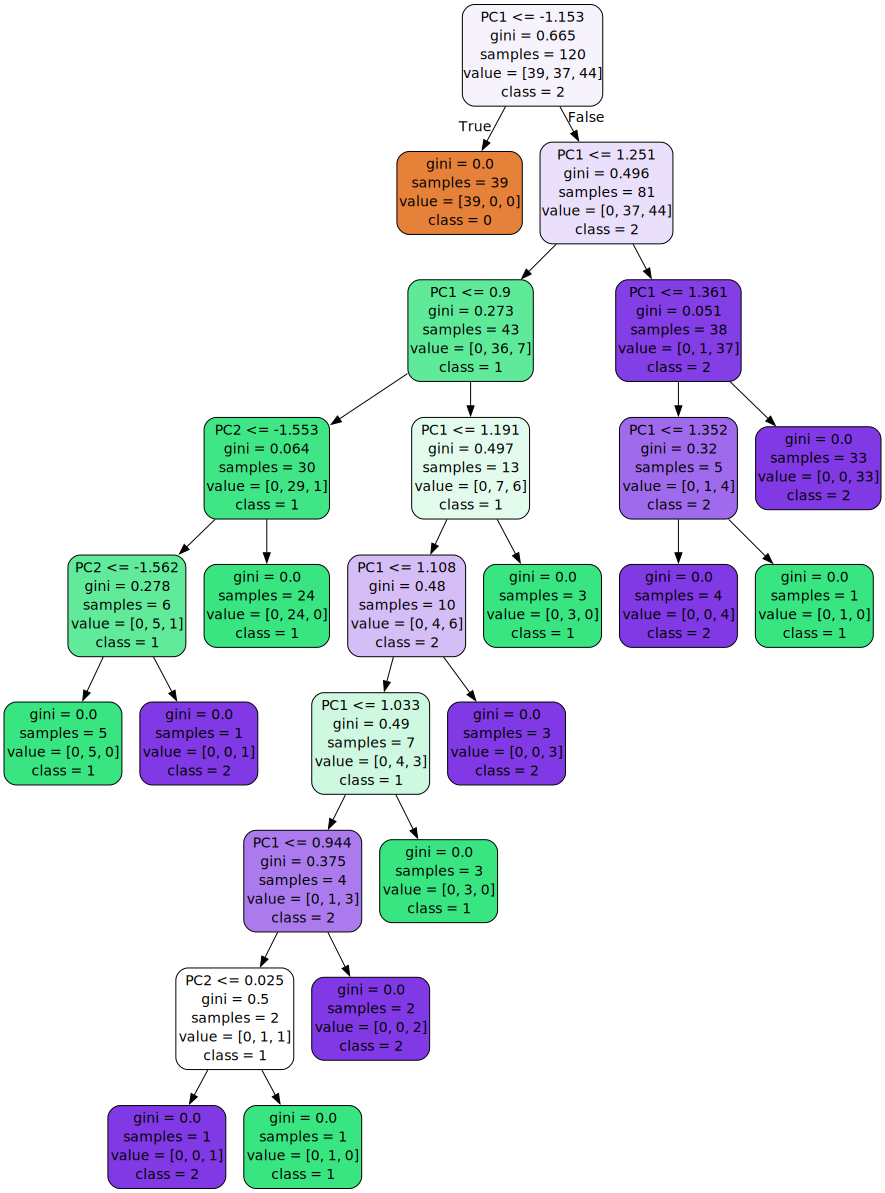

+----+------------+---------+------------+---------+
|    | 종속변수   |   CLASS | 독립변수   |     VIF |
|----+------------+---------+------------+---------|
|  0 | target     |       0 | PC1        | 1.09906 |
|  1 | target     |       0 | PC2        | 1.09906 |
+----+------------+---------+------------+---------+
+----+------------+---------+------------+---------+
|    | 종속변수   |   CLASS | 독립변수   |     VIF |
|----+------------+---------+------------+---------|
|  0 | target     |       1 | PC1        | 1.09906 |
|  1 | target     |       1 | PC2        | 1.09906 |
+----+------------+---------+------------+---------+
+----+------------+---------+------------+---------+
|    | 종속변수   |   CLASS | 독립변수   |     VIF |
|----+------------+---------+------------+---------|
|  0 | target     |       2 | PC1        | 1.09906 |
|  1 | target     |       2 | PC2        | 1.09906 |
+----+------------+---------+------------+---------+


{'SVC': SVC(random_state=1234),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=1234),
 'GaussianNB': GaussianNB(),
 'LogisticRegression': LogisticRegression(C=1, max_iter=1000, n_jobs=-1, random_state=1234),
 'KNeighborsClassifier': KNeighborsClassifier(metric='euclidean', n_jobs=-1, weights='distance'),
 'SGDClassifier': SGDClassifier(alpha=0.1, early_stopping=True, eta0=0.01, loss='modified_huber',
               max_iter=4000, n_jobs=-1, penalty='l1', random_state=1234),
 'best': DecisionTreeClassifier(random_state=1234)}

In [4]:
target_df = pca.copy()
target_df['target'] = origin['Species']
target_df = my_labelling(target_df, 'target')

x_train, x_test, y_train, y_test = my_train_test_split(target_df, yname='target')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

my_classification(x_train, y_train, x_test, y_test)